<h1>Speed Dating: Who to Date Long Term</h1>

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.<br>

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.<br>

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.<br>

For more analysis from Iyengar and Fisman, read Racial Preferences in Dating.<br>

Data Exploration Ideas<br>

What are the least desirable attributes in a male partner? Does this differ for female partners?<br>
How important do people think attractiveness is in potential mate selection vs. its real impact?<br>
Are shared interests more important than a shared racial background?<br>
Can people accurately predict their own perceived value in the dating market?<br>
In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

<h2>Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

print('pandas version is {}.'.format(pd.__version__))
print('numpy version is {}.'.format(np.__version__))
print('scikit-learn version is {}.'.format(sklearn.__version__))
print('seaborn version is {}.'.format(sns.__version__))
print('matplotlib version is {}.'.format(matplotlib.__version__))


pandas version is 0.18.0.
numpy version is 1.10.4.
scikit-learn version is 0.17.1.
seaborn version is 0.7.1.
matplotlib version is 1.5.1.


In [2]:
data = pd.read_csv("Speed Dating Data.csv")
print "This set has {} data points and {} features.".format(*data.shape)

This set has 8378 data points and 195 features.


<h1>Data Exploration</h1>

<h4>Samples for each Feature</h4>

In [3]:
import features_creator as fc #importing feature names made in file features_creator.py
fc.count_samples_in_features(data)#count samples for each feature

	iid 8378 		id 8377 		gender 8378 		idg 8378 		condtn 8378 		wave 8378 		round 8378 		position 8378 		positin1 6532 		order 8378 		partner 8378 		pid 8368 		match 8378 		int_corr 8220 		samerace 8378 		age_o 8274 		race_o 8305 		pf_o_att 8289 		pf_o_sin 8289 		pf_o_int 8289 		pf_o_fun 8280 		pf_o_amb 8271 		pf_o_sha 8249 		dec_o 8378 		attr_o 8166 		sinc_o 8091 		intel_o 8072 		fun_o 8018 		amb_o 7656 		shar_o 7302 		like_o 8128 		prob_o 8060 		met_o 7993 		age 8283 		field 8315 		field_cd 8296 		undergra 4914 		mn_sat 3133 		tuition 3583 		race 8315 		imprace 8299 		imprelig 8299 		from 8299 		zipcode 7314 		income 4279 		goal 8299 		date 8281 		go_out 8299 		career 8289 		career_c 8240 		sports 8299 		tvsports 8299 		exercise 8299 		dining 8299 		museums 8299 		art 8299 		hiking 8299 		gaming 8299 		clubbing 8299 		reading 8299 		tv 8299 		theater 8299 		movies 8299 		concerts 8299 		music 8299 		shopping 8299 		yoga 8299 		exphappy 8277 		expnum 1800 		attr1_1 8299 		sinc1_1 8299 		

<h4>Features Space of interest (with most samples avalaible)</h4>

In [4]:
for i, j in zip(data.keys(), data.count()):
        if i in fc.all_space:
            print '\t', i, j, '\t',

	iid 8378 		gender 8378 		order 8378 		pid 8368 		match 8378 		int_corr 8220 		samerace 8378 		age_o 8274 		race_o 8305 		pf_o_att 8289 		pf_o_sin 8289 		pf_o_int 8289 		pf_o_fun 8280 		pf_o_amb 8271 		pf_o_sha 8249 		dec_o 8378 		attr_o 8166 		sinc_o 8091 		intel_o 8072 		fun_o 8018 		amb_o 7656 		shar_o 7302 		like_o 8128 		prob_o 8060 		met_o 7993 		age 8283 		field_cd 8296 		race 8315 		imprace 8299 		imprelig 8299 		zipcode 7314 		goal 8299 		date 8281 		go_out 8299 		career_c 8240 		sports 8299 		tvsports 8299 		exercise 8299 		dining 8299 		museums 8299 		art 8299 		hiking 8299 		gaming 8299 		clubbing 8299 		reading 8299 		tv 8299 		theater 8299 		movies 8299 		concerts 8299 		music 8299 		shopping 8299 		yoga 8299 		exphappy 8277 		attr1_1 8299 		sinc1_1 8299 		intel1_1 8299 		fun1_1 8289 		amb1_1 8279 		shar1_1 8257 		attr2_1 8299 		sinc2_1 8299 		intel2_1 8299 		fun2_1 8299 		amb2_1 8289 		shar2_1 8289 		attr3_1 8273 		sinc3_1 8273 		fun3_1 8273 		intel3_1 8273 		amb3_1 8273

<h4>Features not Selected</h4>

In [5]:
for i, j in zip(data.keys(), data.count()):
        if i not in fc.all_space:
            print '\t', i, j, '\t',

	id 8377 		idg 8378 		condtn 8378 		wave 8378 		round 8378 		position 8378 		positin1 6532 		partner 8378 		field 8315 		undergra 4914 		mn_sat 3133 		tuition 3583 		from 8299 		income 4279 		career 8289 		expnum 1800 		attr4_1 6489 		sinc4_1 6489 		intel4_1 6489 		fun4_1 6489 		amb4_1 6489 		shar4_1 6467 		attr5_1 4906 		sinc5_1 4906 		intel5_1 4906 		fun5_1 4906 		amb5_1 4906 		match_es 7205 		attr1_s 4096 		sinc1_s 4096 		intel1_s 4096 		fun1_s 4096 		amb1_s 4096 		shar1_s 4096 		attr3_s 4000 		sinc3_s 4000 		intel3_s 4000 		fun3_s 4000 		amb3_s 4000 		satis_2 7463 		length 7463 		numdat_2 7433 		attr7_2 1984 		sinc7_2 1955 		intel7_2 1984 		fun7_2 1984 		amb7_2 1955 		shar7_2 1974 		attr1_2 7445 		sinc1_2 7463 		intel1_2 7463 		fun1_2 7463 		amb1_2 7463 		shar1_2 7463 		attr4_2 5775 		sinc4_2 5775 		intel4_2 5775 		fun4_2 5775 		amb4_2 5775 		shar4_2 5775 		attr2_2 5775 		sinc2_2 5775 		intel2_2 5775 		fun2_2 5775 		amb2_2 5775 		shar2_2 5775 		attr3_2 7463 		sinc3_2 7463 		intel3_

<h4>Scale Numerical features between 0 & 1</h4>

In [6]:
fc.likert_scale_question_3(data)#likert scale from 0 - 10. Some samples were at rating 12. this function brings rating of 12 down to ratings to 10
fc.scale_majority_of_features(data)#this function scales most features between 0 - 1
fc.scale_exphappy(data)
fc.scale_question_4(data)#different waves were at different scales. all scaled repectively between 0 - 1 in this function call
fc.convert_income_to_float(data)#income was imported as string this call converts strings to float
fc.convert_tuition_to_float(data)#ditto, tuition was imported as strings and are converted to float
fc.zipcode_to_float(data)
fc.sat_to_float(data)#this function converts sat scores to float

<h4>Outlier Detection: Turkey's Method</h4>

In [7]:
index_to_be_removed = fc.outlier_detection(data[fc.feature_space[10:72]]) #these indices span at least 15  features as outliers
print index_to_be_removed
data.drop(data.index[index_to_be_removed], inplace = True)

[8203, 8209, 8219, 8359, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 8204, 739, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 911, 920, 921, 951, 961, 981, 1001, 8218, 1695, 1715, 1765, 1785, 1795, 1805, 1825, 1835, 1839, 1841, 1845, 1866, 1867, 1868, 1869, 1870, 8208, 8271, 8220, 8207, 4861, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5032, 5035, 5054, 8217, 5074, 5076, 5096, 5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131, 5138, 5139, 5176, 5246, 5247, 5284, 5295, 5296, 5299, 5302, 5303, 5305, 5306, 5310, 5311, 5320, 5334, 5352, 5355, 5375, 5378, 5388, 5419, 5439, 5481, 5482, 5499, 5510, 5516, 5530, 5536, 5542, 5544, 5552, 5558, 5559, 5560, 5579, 5583, 5604, 5619, 5625, 5639, 5643, 5666, 5689, 5706, 5719, 5739, 5746, 5765, 5784, 5822, 5936, 6031, 6069, 6122, 6123

<h4>Correlation Heat Map</h4>

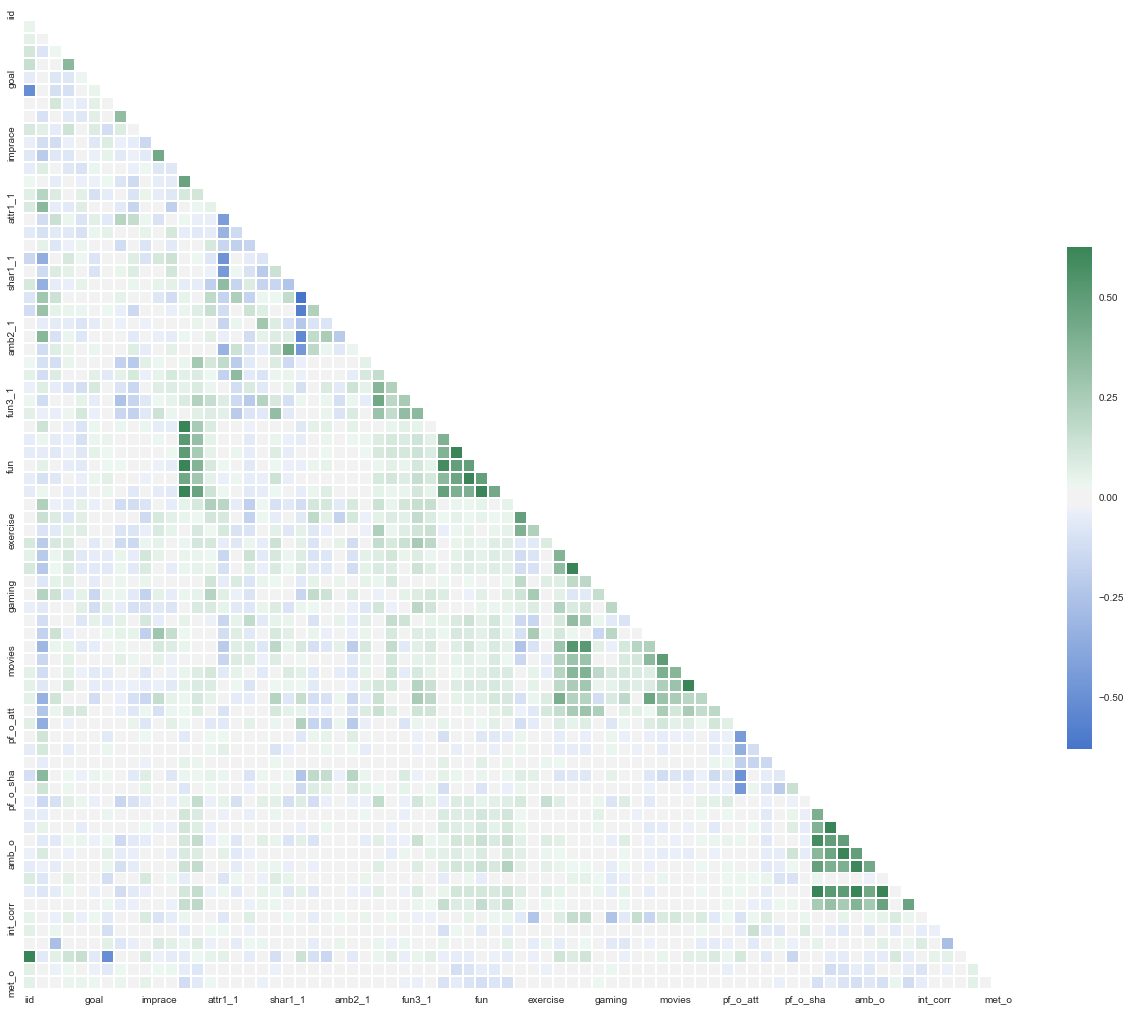

In [8]:
fc.make_corr(data[fc.feature_space])

<h2>Unique Profiles</h2>

In [9]:
#unique = data.copy()
#unique.drop_duplicates(subset = 'iid', keep = 'first', inplace = True)

<h4>Stats and Frequency Charts for Females</h4>

In [10]:
#fc.dating_attributes_vs_time_describe(data = unique, gender = 0)

In [11]:
#fc.dating_attributes_vs_time_hist(data = unique, gender = 0)

<h4>Stats and Frequency Charts for Males</h4>

In [12]:
#fc.dating_attributes_vs_time_describe(data = unique, gender = 1)

In [13]:
#fc.dating_attributes_vs_time_hist(data = unique, gender = 1)

<h2>Create Matched People DataFrame</h2>

In [14]:
#people_matched = data[data['match'] == 1].copy()
#people_matched.drop_duplicates(subset = 'iid', keep = 'first', inplace = True)
#display(people_matched)

<h2>Exploring Matches</h2>

In [15]:
#people_matched[['iid', 'gender', 'dec'] + fc.features_of_attraction + fc.preferences_of_attraction + ['dec_o', 'pid', 'goal', 'int_corr', 'match']]

<h4>Get Index for 'iid' for non-matches</h4>

In [16]:
#number = [int(i) for i in people_matched['iid']]
#not_ever_matched = [i for i in range(1,553) if i not in number]
#print not_ever_matched

In [17]:
#people_not_matched = data[data['iid'].isin(not_ever_matched)].copy()

<h2>Exploring Non-Matches</h2>

In [18]:
#people_not_matched[['iid', 'gender', 'dec'] + fc.features_of_attraction + fc.preferences_of_attraction + ['dec_o', 'pid', 'goal', 'int_corr', 'match']]

<h4>Non-Matched Females: Graphs</h4>

In [19]:
#fc.dating_attributes_vs_time(data = people_not_matched, gender = 0)

<h4>Non-Matched Males: Graphs</h4>

In [20]:
#fc.dating_attributes_vs_time(data = people_not_matched, gender = 1)

<h2>Dating Attributes as a function of Time: Distributing 100pts</h2>

<h4>Female Attributes</h4>

In [21]:
#fc.dating_attributes_vs_time_describe(unique[(unique['wave'] >= 6) & (unique['wave']<= 11)], 0)

<h4>Male Attributes</h4>

In [22]:
#fc.dating_attributes_vs_time_describe(unique[(unique['wave'] >= 6) & (unique['wave']<= 11)], 1)

<h2>Dating Attributes as a function of Time: Likert Scale</h2>

<h4>Female Attributes</h4>

In [23]:
#fc.dating_attributes_vs_time_describe(unique[(unique['wave'] >= 15) & (unique['wave']<= 20)], 0)

<h4>Male Attributes</h4>

In [24]:
#fc.dating_attributes_vs_time_describe(unique[(unique['wave'] >= 15) & (unique['wave']<= 20)], 1)

<h2>ExtraTreeClassifier: Ensemble Learning</h2>

In [25]:
women_men = data[fc.all_space].copy()

In [26]:
women_men.dropna(axis = 0, how = 'any', inplace = True)

<h3>Both Genders</h3>

In [27]:
target_df = women_men['dec'].copy()
input_df = women_men[fc.feature_space].copy()

<h3>ExtraTreeClassifier: Ensemble Learning</h3>

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(random_state = 0)
clf = clf.fit(input_df, target_df)
model = SelectFromModel(clf, prefit=True)
input_df_new = model.transform(input_df)
original_space = input_df.shape
new_space_ETC = input_df_new.shape
print 'Old Space is (number of samples, number of features)', input_df.shape
print 'New Space is (number of samples, number of features)', input_df_new.shape

Old Space is (number of samples, number of features) (4771, 77)
New Space is (number of samples, number of features) (4771L, 10L)


<h4>Pair and rank Features of Important</h4>

In [29]:
tuple_holder = [(j, i) for i, j in zip(fc.feature_space, clf.feature_importances_)]
tuple_holder.sort()
tuple_holder.reverse()

In [30]:
#for i, j in fc.data_cleaner.iteritems():
#    print i, j, '\n'
#for i, j in fc.master_list.items():
#    print i, j, '\n'
#print 'clean_up_1', '\n', fc.clean_up_1, '\n'
#print 'clean_up_2', '\n', fc.clean_up_2, '\n'
#print 'clean_up_3', '\n', fc.clean_up_3, '\n'
#print 'clean_up_4', '\n', fc.clean_up_4, '\n'
#print 'clean_up_5', '\n', fc.clean_up_5, '\n'
#print 'features_of_attraction', '\n', fc.features_of_attraction, '\n'
#print 'actual_decisions', '\n', fc.actual_decisions, '\n'
#print 'preferences_of_attraction', '\n', fc.preferences_of_attraction, '\n'
#print 'rating_by_partner_features', '\n', fc.rating_by_partner_features, '\n'
#print 'halfway_questions', '\n', fc.halfway_questions, '\n'
#print 'interests', '\n', fc.interests, '\n'
#print 'list_of_lists', '\n', fc.list_of_lists, '\n'
#print 'feature_space', '\n', fc.feature_space, '\n'
#print 'all_space', '\n', fc.all_space, '\n'
#print 'all columns in dataset', '\n'
#for i in data.keys():
#    print i,
to_drop = [i for i in data.keys() if i not in fc.all_space]
#print '\n'*2, 'to_drop', '\n', to_drop, '\n'

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 0)
clf = clf.fit(input_df, target_df)
model = SelectFromModel(clf, prefit=True)
input_df_new = model.transform(input_df)
new_space_RFC = input_df_new.shape
print 'Old Space is (number of samples, number of features)', input_df.shape
print 'New Space is (number of samples, number of features)', input_df_new.shape

Old Space is (number of samples, number of features) (4771, 77)
New Space is (number of samples, number of features) (4771L, 15L)


In [32]:
tuple_holder_2 = [(j, i) for i, j in zip(fc.feature_space, clf.feature_importances_)]
tuple_holder_2.sort()
tuple_holder_2.reverse()

In [33]:
rank_number = 0
print 'ExtraTreesClassifier', '\t'*5, 'RandomForestClassifier'
print 'Old Space: ', original_space, '\t'*5, 'Old Space:', original_space
print 'New Space: ', new_space_ETC, '\t'*5, 'New Space:', new_space_RFC
for i, j in zip(tuple_holder, tuple_holder_2):
    rank_number += 1
    print rank_number, '|', i, '\t'*4, rank_number, '|', j

ExtraTreesClassifier 					RandomForestClassifier
Old Space:  (4771, 77) 					Old Space: (4771, 77)
New Space:  (4771L, 10L) 					New Space: (4771L, 15L)
1 | (0.12882382678942111, 'like') 				1 | (0.11724475135736463, 'like')
2 | (0.078144079726549881, 'attr') 				2 | (0.092432363715555743, 'attr')
3 | (0.043185689352665479, 'fun') 				3 | (0.047901693889207606, 'shar')
4 | (0.041582792248598642, 'shar') 				4 | (0.039385055068462217, 'fun')
5 | (0.020972228880790249, 'prob') 				5 | (0.030460896801508153, 'prob')
6 | (0.018125884318822356, 'sinc') 				6 | (0.020904912460982642, 'pid')
7 | (0.016617523170761445, 'intel') 				7 | (0.019911463937780146, 'intel')
8 | (0.014886321936302235, 'prob_o') 				8 | (0.017299475006498637, 'prob_o')
9 | (0.013351503064923725, 'age_o') 				9 | (0.014845146618526405, 'int_corr')
10 | (0.013109440784277459, 'pf_o_sin') 				10 | (0.014800145931557674, 'order')
11 | (0.012361255819250096, 'pid') 				11 | (0.014270641347391167, 'attr2_1')
12 | (0.01220364